In [1]:
import numpy as np
import pandas as pd
import cbsodata
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
#toc = pd.DataFrame(cbsodata.get_table_list())
#toc
info = cbsodata.get_info('70895ned') # Returns a dict with info
[info.get(key) for key in ['Title', 'Modified']]

['Overledenen; geslacht en leeftijd, per week', '2022-01-14T02:00:00']

In [3]:
data = pd.DataFrame(cbsodata.get_data('70895ned'))
data.dropna(subset = ["Overledenen_1"], inplace=True)
df=data[data.Perioden.str.contains('week')]
df=df[df.Perioden.str.contains('1995 week 0')==False].reset_index(drop=True)
df.iloc[1430:1440]

,ID,Geslacht,LeeftijdOp31December,Perioden,Overledenen_1
1430,1457,Totaal mannen en vrouwen,Totaal leeftijd,2021 week 52 (5 dagen),2684.0
1431,1459,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 0 (2 dagen),937.0
1432,1460,Totaal mannen en vrouwen,Totaal leeftijd,2022 week 1,3461.0
1433,1462,Totaal mannen en vrouwen,0 tot 65 jaar,1995 week 1,476.0
1434,1463,Totaal mannen en vrouwen,0 tot 65 jaar,1995 week 2,511.0
1435,1464,Totaal mannen en vrouwen,0 tot 65 jaar,1995 week 3,473.0
1436,1465,Totaal mannen en vrouwen,0 tot 65 jaar,1995 week 4,513.0
1437,1466,Totaal mannen en vrouwen,0 tot 65 jaar,1995 week 5,484.0
1438,1467,Totaal mannen en vrouwen,0 tot 65 jaar,1995 week 6,464.0
1439,1468,Totaal mannen en vrouwen,0 tot 65 jaar,1995 week 7,503.0


In [4]:
df_clean = df.drop(columns = ['ID'])
df_clean['to_first_week']=df_clean.Perioden.str.contains('dag') & df_clean.Perioden.str.contains('week 1')
df_clean['to_last_week']=df_clean.Perioden.str.contains('dag') & df_clean.Perioden.shift(-1).str.contains('week 0')
df_clean['partial_week']=df_clean.Perioden.str.contains('dag')
df_clean.loc[df_clean['to_first_week'] == True, 'deaths'] = df_clean['Overledenen_1'].shift(+1) + df_clean['Overledenen_1'] 
df_clean.loc[df_clean['to_last_week'] == True, 'deaths'] = df_clean['Overledenen_1'].shift(-1) + df_clean['Overledenen_1'] 
df_clean.loc[df_clean['partial_week'] == False, 'deaths'] = df_clean['Overledenen_1']
df_clean = df_clean.dropna(subset = ["deaths"]).reset_index(drop=True)
df_clean[['year','week']] = df_clean.Perioden.str.split("week",expand=True)
df_clean['week'] = df_clean.week.str.extract('(\d+)')
df_clean['year'] = df_clean.year.str.extract('(\d+)')
df_clean = df_clean.drop(columns = ['Overledenen_1','to_first_week','to_last_week','partial_week'])
df_clean = df_clean.rename(columns={"LeeftijdOp31December": "age", "Geslacht": "gender"})
df_clean = df_clean[['Perioden','gender','age','year','week','deaths']]

#remove this line to get the full time period
df_clean=df_clean[df_clean.Perioden >= '2010'].reset_index(drop=True)

df_clean['covid_year']=df_clean['year'] >= '2020'
df_clean.loc[df_clean['covid_year'] == False, 'covid_year'] = '2010-2019 +/- SD'
df_clean.loc[df_clean['covid_year'] == True, 'covid_year'] = df_clean['year']
df_clean.iloc[620:640]

,Perioden,gender,age,year,week,deaths,covid_year
620,2021 week 47,Totaal mannen en vrouwen,Totaal leeftijd,2021,47,4187.0,2021
621,2021 week 48,Totaal mannen en vrouwen,Totaal leeftijd,2021,48,4386.0,2021
622,2021 week 49,Totaal mannen en vrouwen,Totaal leeftijd,2021,49,4362.0,2021
623,2021 week 50,Totaal mannen en vrouwen,Totaal leeftijd,2021,50,4030.0,2021
624,2021 week 51,Totaal mannen en vrouwen,Totaal leeftijd,2021,51,3733.0,2021
625,2021 week 52 (5 dagen),Totaal mannen en vrouwen,Totaal leeftijd,2021,52,3621.0,2021
626,2022 week 1,Totaal mannen en vrouwen,Totaal leeftijd,2022,1,3461.0,2022
627,2010 week 1,Totaal mannen en vrouwen,0 tot 65 jaar,2010,1,441.0,2010-2019 +/- SD
628,2010 week 2,Totaal mannen en vrouwen,0 tot 65 jaar,2010,2,466.0,2010-2019 +/- SD
629,2010 week 3,Totaal mannen en vrouwen,0 tot 65 jaar,2010,3,481.0,2010-2019 +/- SD


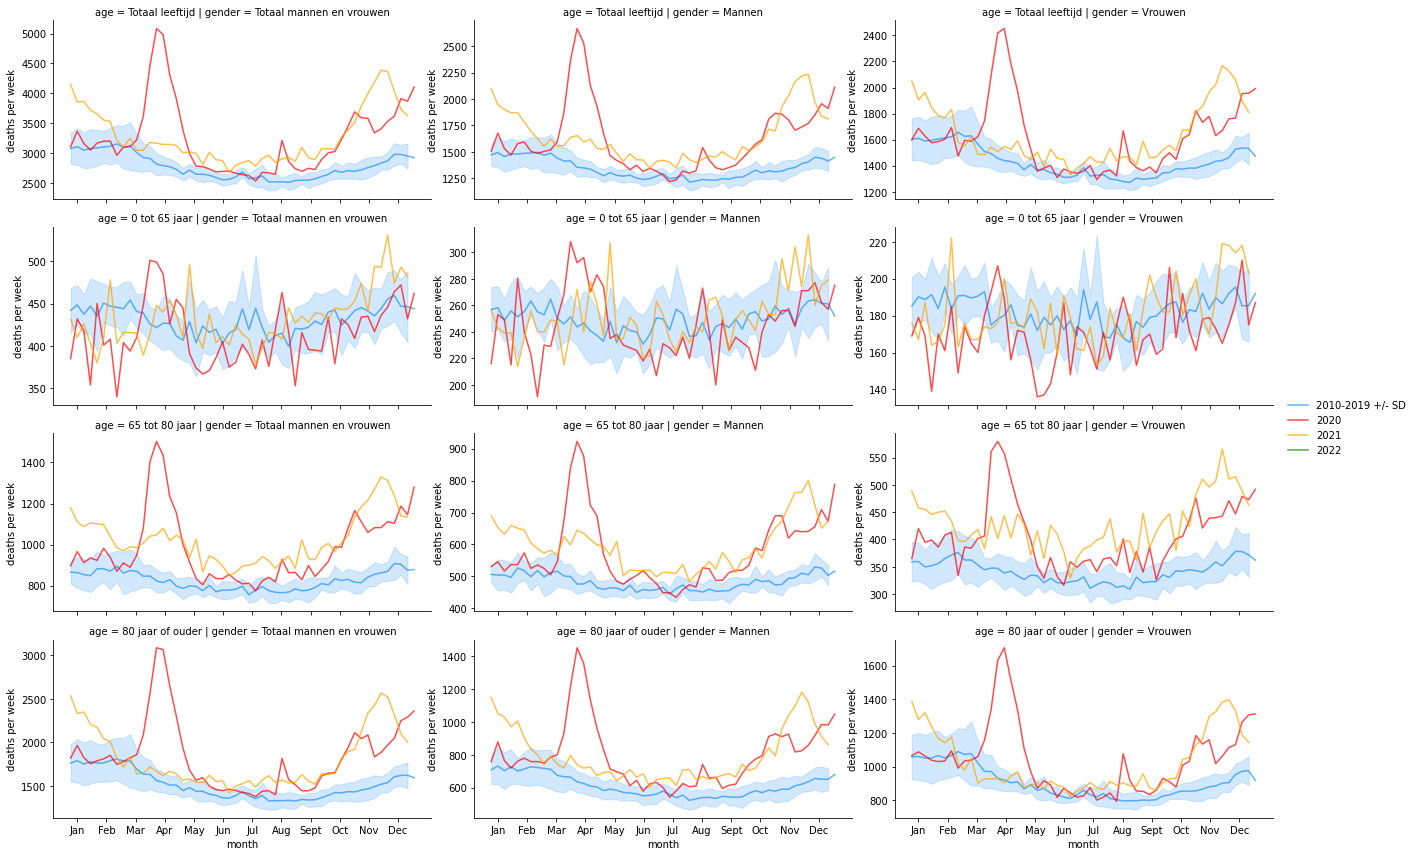

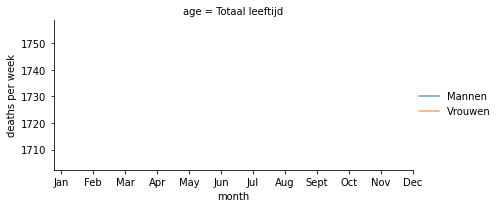

In [5]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
current_year = df_clean['year'].max()

g = sns.FacetGrid(df_clean, col="gender", hue="covid_year", palette=["dodgerblue","red","orange", "green"], row='age', aspect=2,sharey=False)
g.map(sns.lineplot, 'week', 'deaths', alpha=.7, estimator='mean', ci='sd')
g.set(xlabel="month", ylabel = "deaths per week", xticks=np.arange(1, 53,(53/12) ), xticklabels=months)
g.add_legend(title = '')
for suffix in 'png svg'.split():
    g.savefig('naar_Geslacht_leeftijd.'+suffix, dpi=200, bbox_inches='tight', facecolor='white')

g = sns.FacetGrid(df_clean.query("year == @current_year & gender !='Totaal mannen en vrouwen'"), col="age", hue="gender", aspect=2,sharey=False)
g.map(sns.lineplot, 'week', 'deaths', alpha=.7)
g.set(xlabel="month", ylabel = "deaths per week", xticks=np.arange(1, 53,(53/12) ), xticklabels=months)
g.add_legend(title = '')
for suffix in 'png svg'.split():
    g.savefig(current_year+'_leeftijd.'+suffix, dpi=200, bbox_inches='tight', facecolor='white')

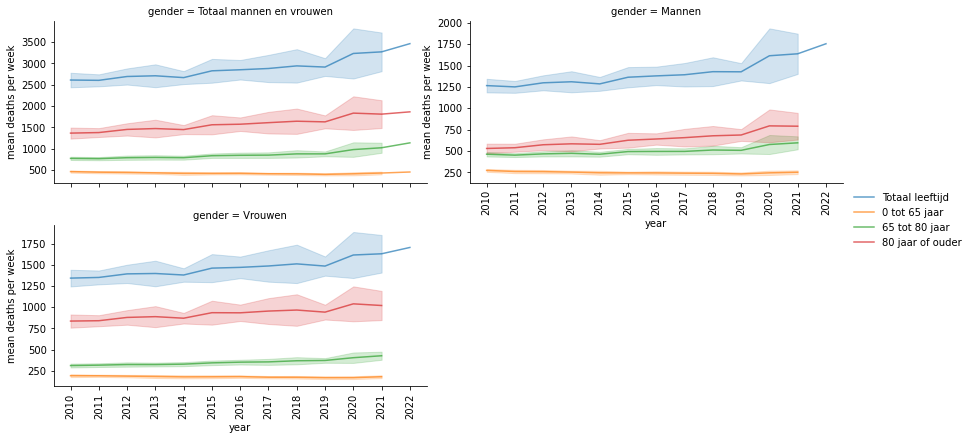

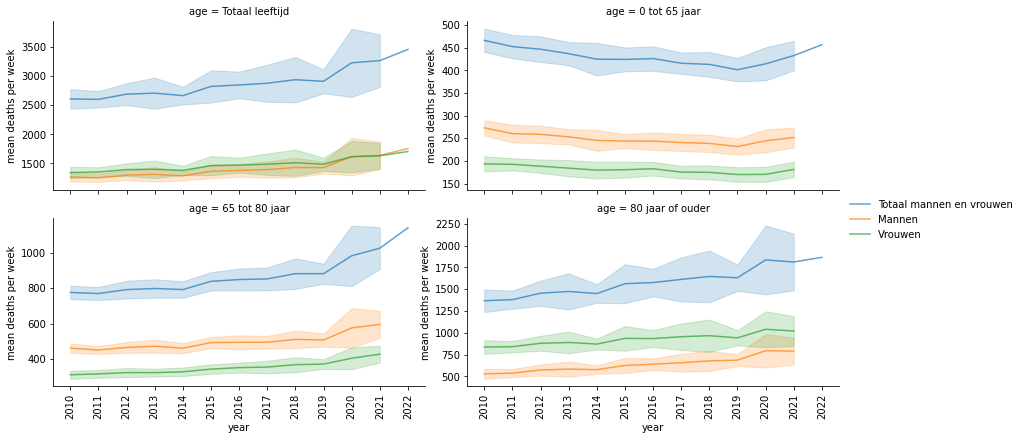

In [6]:
g = sns.FacetGrid(df_clean, col="gender", hue="age", col_wrap=2, aspect=2,sharey=False)
g.map(sns.lineplot, 'year', 'deaths', alpha=.7, estimator='mean', ci='sd')
g.set(xlabel="year", ylabel = "mean deaths per week")
g.set_xticklabels(rotation=90)
g.add_legend(title = '')
g.savefig('perjaar_Geslacht.svg', bbox_inches='tight', facecolor='white')

g = sns.FacetGrid(df_clean, col="age", hue="gender",col_wrap=2, aspect=2,sharey=False)
g.map(sns.lineplot, 'year', 'deaths', alpha=.7, estimator='mean', ci='sd')
g.set(xlabel="year", ylabel = "mean deaths per week")
g.set_xticklabels(rotation=90)
g.add_legend(title = '')
g.savefig('perjaar_leeftijd.svg', bbox_inches='tight', facecolor='white')

In [7]:
leeftijd='Totaal leeftijd'
#leeftijd='0 tot 65 jaar'
#leeftijd='65 tot 80 jaar'
#leeftijd='80 jaar of ouder'
sex='Totaal mannen en vrouwen'
#sex='Mannen'
#sex='Vrouwen'

df_circle=df_clean[(df_clean.age == leeftijd) & (df_clean.gender == sex)]
df_circle = df_circle.groupby('Perioden').sum().squeeze()
df_circle

Perioden
2010 week 1     2767.0
2010 week 10    2760.0
2010 week 11    2686.0
2010 week 12    2687.0
2010 week 13    2586.0
                 ...  
2021 week 6     3550.0
2021 week 7     3528.0
2021 week 8     3207.0
2021 week 9     3105.0
2022 week 1     3461.0
Name: deaths, Length: 627, dtype: float64

In [8]:
deaths_per_year = pd.DataFrame(columns=range(2010, int(current_year)+1), index=pd.RangeIndex(1, 53+1, name='week'))

for Perioden, deaths in df_circle.iteritems():
    year = int(Perioden[0:4])
    week = int(Perioden[9:12])
    deaths_per_year.loc[week, year] = deaths

deaths_per_year

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
week,,,,,,,,,,,,,
1,2767.0,2917.0,2930.0,2947.0,2766.0,3255.0,3173.0,3568.0,3343.0,3062.0,3103.0,4146.0,3461.0
2,2830.0,2819.0,2773.0,3038.0,2819.0,3429.0,3075.0,3637.0,3359.0,3262.0,3364.0,3852.0,NaN
3,2846.0,2624.0,2785.0,3011.0,2740.0,3377.0,3062.0,3487.0,3364.0,3152.0,3157.0,3862.0,NaN
4,2865.0,2620.0,2789.0,3082.0,2710.0,3353.0,3201.0,3626.0,3322.0,3179.0,3046.0,3716.0,NaN
5,2858.0,2728.0,2815.0,3192.0,2708.0,3322.0,3103.0,3574.0,3403.0,3139.0,3164.0,3654.0,NaN
6,2831.0,2675.0,3034.0,3143.0,2855.0,3272.0,3036.0,3446.0,3513.0,3183.0,3196.0,3550.0,NaN
7,2900.0,2621.0,3089.0,3033.0,2796.0,3311.0,3027.0,3417.0,3660.0,3254.0,3198.0,3528.0,NaN
8,2929.0,2651.0,3035.0,3211.0,2753.0,3381.0,3319.0,3328.0,3691.0,3220.0,2959.0,3207.0,NaN
9,2757.0,2686.0,3061.0,3170.0,2713.0,3207.0,3185.0,3152.0,3937.0,3065.0,3098.0,3105.0,NaN


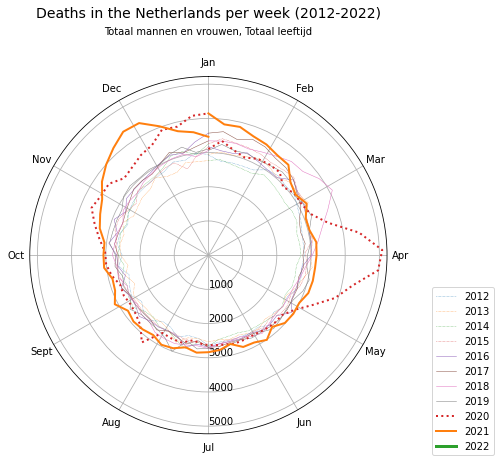

In [9]:
def data_for_year(y):
    year = deaths_per_year[y].dropna().to_numpy()
    if y == int(current_year):
        num_weeks = len(year)
        day_of_the_year = num_weeks*7 + 3 # ex. week 46 -> november 15 -> day 319
        theta = np.linspace(0, (day_of_the_year/365)*2*np.pi, num_weeks)
    else:
        # append first week of next year for correct radial plotting
        year = np.append(year, deaths_per_year.loc[1, y+1])
        theta = np.linspace(0, 2*np.pi, len(year))
    return (theta, year)

def plot_year(ax, y, **kwargs):
    ax.plot(*data_for_year(y), label=f"{y}", **kwargs)

def setup_polar_plot(figsize=(8, 6), constrained_layout=True):
    fig = plt.figure(figsize=figsize, constrained_layout=constrained_layout)
    ax = fig.add_subplot(111, projection='polar')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/6))
    ax.set_xticklabels(months)

    ax.set_rlabel_position(180)
#    ax.set_yticklabels(['1000', '2000', '3000', '4000', '5000', ''])

    return fig, ax

fig, ax = setup_polar_plot()
plot_year(ax, int(current_year)-10, linewidth=0.5, linestyle='dotted')
plot_year(ax, int(current_year)-9, linewidth=0.5, linestyle='dotted')
plot_year(ax, int(current_year)-8, linewidth=0.5, linestyle='dotted')
plot_year(ax, int(current_year)-7, linewidth=0.5, linestyle='dotted')
plot_year(ax, int(current_year)-6, linewidth=0.5)
plot_year(ax, int(current_year)-5, linewidth=0.5)
plot_year(ax, int(current_year)-4, linewidth=0.5)
plot_year(ax, int(current_year)-3, linewidth=0.5)
plot_year(ax, int(current_year)-2, color='tab:red', linewidth=2, linestyle='dotted')
plot_year(ax, int(current_year)-1, color='tab:orange', linewidth=2)
plot_year(ax, int(current_year), color='tab:green', linewidth=3)

fig.legend(loc='lower right')
fig.suptitle('Deaths in the Netherlands per week ('+str(int(current_year)-10)+'-'+current_year+')', fontsize=14, y=1.04)
ax.set_title(f"{sex}, {leeftijd}", fontsize=10, y=1.1)
for suffix in 'png svg'.split():
    plt.savefig('sterfte_perjaar.'+suffix, dpi=200, bbox_inches='tight', facecolor='white')

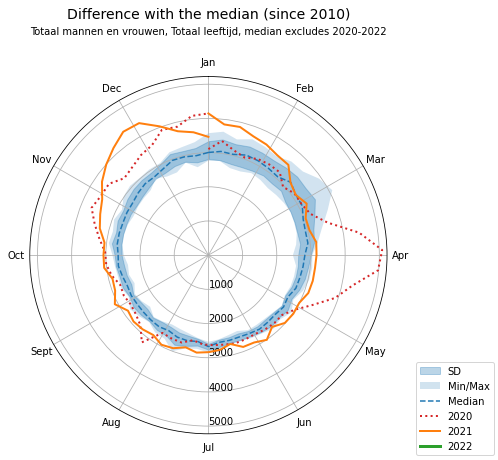

In [10]:
years = deaths_per_year.loc[:, ~deaths_per_year.columns.isin([2020, 2021,int(current_year)])] # excluding corona years and current year

mean = years.mean(skipna=True,axis=1)
mean[53] = mean[1]

median = years.median(skipna=True,axis=1)
median[53] = median[1]

min = years.min(axis=1)
min[53] = min[1]

max = years.max(axis=1)
max[53] = max[1]

sd = years.std(axis=1)
sd[53] = sd[1]

q25 = deaths_per_year.astype(float).quantile(0.25, axis=1)
q25[53] = q25[1]

q75 = deaths_per_year.astype(float).quantile(0.75, axis=1)
q75[53] = q75[1]

fig, ax = setup_polar_plot()

# ax.plot(np.linspace(0, 2*np.pi, len(mean)), mean, label="5y mean")
# ax.plot(np.linspace(0, 2*np.pi, len(data_for_year(2019))), data_for_year(2019), label="2019")
ax.fill_between(np.linspace(0, 2*np.pi, len(min)), mean+sd, mean-sd, alpha=0.3, label="SD", color='tab:blue')

ax.fill_between(np.linspace(0, 2*np.pi, len(min)), min, max, alpha=0.2, label="Min/Max")
#ax.fill_between(np.linspace(0, 2*np.pi, len(q25)), q25, q75, alpha=0.3, label="50%", color='tab:green')

ax.plot(np.linspace(0, 2*np.pi, len(median)), median, label="Median", linestyle='dashed')
plot_year(ax, int(current_year)-2, color='tab:red', linewidth=2, linestyle='dotted')
plot_year(ax, int(current_year)-1, color='tab:orange', linewidth=2)
plot_year(ax, int(current_year), color='tab:green', linewidth=3)


#ax.set_rmax(5500)
fig.legend(loc='lower right')
fig.suptitle(f"Difference with the median (since 2010)", fontsize=14, y=1.04)
ax.set_title(f"{sex}, {leeftijd}, median excludes 2020-2022", fontsize=10, y=1.1)
for suffix in 'png svg'.split():
    plt.savefig('sterfte_median.'+suffix, dpi=200, bbox_inches='tight', facecolor='white')

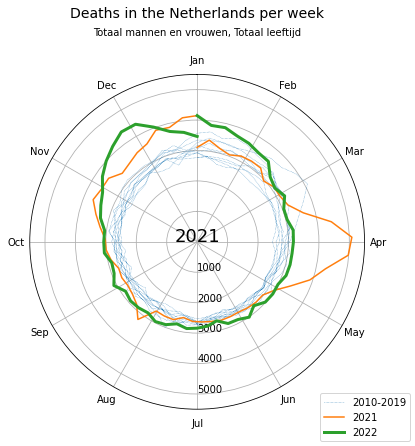

In [18]:
start_year = 2010

fig, ax = setup_polar_plot(figsize=(6, 6.2), constrained_layout=False)

# english month labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# nudge ax position
pos = ax.get_position()
pos.y0 -= 0.05
pos.y1 -= 0.05
pos.x0 -= 0.012
pos.x1 -= 0.012
ax.set_position(pos)

fig.suptitle("Deaths in the Netherlands per week", fontsize=14)
ax.set_title(f"{sex}, {leeftijd}", fontsize=10, y=1.1)


old, = ax.plot([], [], color='tab:blue', linewidth=0.5, linestyle='dotted', label="2010-2019")
prev, = ax.plot([], [], color='tab:orange', label=int(current_year)-1)
current, = ax.plot([], [], color='tab:green', linewidth=3, label=int(current_year),animated=True)
center = ax.text(0, 25, "5000", horizontalalignment='center', fontsize=18)
ax.set_rmax(5500)

def year_and_week_for_index(i):
    y = start_year
    while True:
        len_year = len(deaths_per_year[y].dropna()) + 1
        if len_year > i:
            return (y, i+1)
        else:
            y += 1
            i -= (len_year-1)

def data_for_index(i):
    y, w = year_and_week_for_index(i)
    #print(y, w)
    theta, year = data_for_year(y)
    return theta[:w], year[:w]

def init():
    old.set_data([], []) 
    prev.set_data([], []) 
    current.set_data([], []) 
    center.set_text("")
    return old, prev, current, center

def animate(i):
    y = year_and_week_for_index(i)[0]

    if y > start_year:
        old_theta = np.array([])
        old_data = np.array([])
        for year in range(start_year, y-1):
            theta, data = data_for_year(year)
            old_theta = np.append(old_theta, theta)
            old_data = np.append(old_data, data)
        old.set_data(old_theta, old_data)
        prev.set_data(*data_for_year(y-1))

    current.set_data(*data_for_index(i))
    center.set_text(f"{y}")
    return old, prev, current, center

num_frames = len(df_circle)

anim = mpl.animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, interval=50, blit=True, repeat_delay=200, repeat=True) 
#anim.save('sterfte_anim.mp4', writer='ffmpeg', dpi=300, extra_args=['-vf', 'tpad=stop_mode=clone:stop_duration=5'])
#anim.save(f"img/{sex}_{leeftijd}_anim.gif", writer='imagemagick', dpi=72, fps=30, savefig_kwargs={'facecolor': 'white'})
anim.save('sterfte_anim.gif', writer= PillowWriter(fps=30) , dpi=300)

fig.legend(loc='lower right')
plt.savefig('sterfte_anim.svg', bbox_inches='tight', facecolor='white')